In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from pandas_datareader import data as pdr
yf.pdr_override()

from fredapi import Fred
fred = Fred(api_key='fbc80b72f521fbcf3e158643ada0499c')

# Scenario 4: Publicly traded Equity (e.g. common stock)


# Scenario 6: An illiquid security – carbon credits.

We will analyze closely the price reactions to major regulatory announecements. One of the important events for the market was the European Green deal which was presented on 11 December 2019

In [2]:
cpi2022 = [7, 7.5, 7.9, 8.5, 8.3, 8.6, 9.1, 8.5, 8.3, 8.2, 7.7, 7.1]

In [3]:
len(cpi2022)

12

In [4]:
cpi2023 = [6.5, 6.4, 6, 5, 4.9, 4, 3, 3.2, 3.7,3.7,3.2,3.1,3.4]

In [56]:
cpiYoY_1lag = [8.3, 8.6, 9.1, 8.5, 8.3, 8.2, 7.7, 7.1,6.5, 6.4, 6, 5, 4.9, 4]

In [35]:
cpiYoY = [3, 3.2, 3.7,3.7,3.2,3.1,3.4,3.1,3.2,3.5]

In [36]:
len(cpiYoY)

10

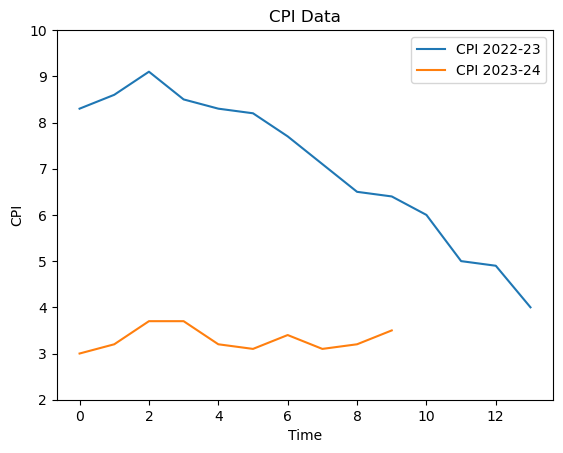

In [38]:
# Your data (cpi2022 and cpi2023)
# Assuming you have defined these series

# Plot the data
plt.plot(cpiYoY_1lag, label='CPI 2022-23', linestyle='-')
plt.plot(cpiYoY, label='CPI 2023-24', linestyle='-')

# Customize the y-axis ticks
plt.yticks(range(2, 11, 1))  # Adjust the range and step as needed

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('CPI')
plt.title('CPI Data')
plt.legend()

# Show the plot
plt.show()

In [40]:
# Find the minimum length of the two lists
min_length = min(len(cpiYoY_1lag), len(cpiYoY))

# Slice both lists to the minimum length
cpiYoY_1lag = cpiYoY_1lag[:min_length]
cpiYoY = cpiYoY[:min_length]

# Convert the lists to NumPy arrays
cpiYoY_1lag = np.array(cpiYoY_1lag)
cpiYoY = np.array(cpiYoY)

# Compute the element-wise difference
difference = cpiYoY_1lag - cpiYoY

# Now, 'difference' contains the element-wise difference between the aligned arrays
print(difference)

[5.3 5.4 5.4 4.8 5.1 5.1 4.3 4.  3.3 2.9]


In [ ]:
# Find the minimum length of the two lists
min_length = min(len(cpi2022), len(cpi2023))

# Slice both lists to the minimum length
cpi2022 = cpi2022[:min_length]
cpi2023 = cpi2023[:min_length]

# Convert the lists to NumPy arrays
cpi2022 = np.array(cpi2022)
cpi2023 = np.array(cpi2023)

# Compute the element-wise difference
difference = cpi2022 - cpi2023

# Now, 'difference' contains the element-wise difference between the aligned arrays
print(difference)

In [7]:
cpi2023

array([6.5, 6.4, 6. , 5. , 4.9, 4. , 3. , 3.2, 3.7, 3.7, 3.2])

In [8]:
cpi2022

array([7. , 7.5, 7.9, 8.5, 8.3, 8.6, 9.1, 8.5, 8.3, 8.2, 7.7])

In [14]:
start = datetime(2005, 1, 1)
end = datetime(2024, 4, 17)
yf.pdr_override()
data = pdr.get_data_yahoo('CL=F', start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [15]:
data

Date
2005-01-03    42.119999
2005-01-04    43.910000
2005-01-05    43.389999
2005-01-06    45.560001
2005-01-07    45.430000
                ...    
2024-04-10    86.209999
2024-04-11    85.019997
2024-04-12    85.660004
2024-04-15    85.410004
2024-04-16    85.360001
Name: Adj Close, Length: 4852, dtype: float64

In [16]:
monthly_average = data.resample('M').mean()

# Print the monthly average
print(monthly_average)

Date
2005-01-31    46.851500
2005-02-28    48.053158
2005-03-31    54.629546
2005-04-30    53.217619
2005-05-31    49.870952
                ...    
2023-12-31    72.123500
2024-01-31    73.860952
2024-02-29    76.610000
2024-03-31    80.405000
2024-04-30    85.592501
Freq: M, Name: Adj Close, Length: 232, dtype: float64


In [41]:
monthly_average2022 = monthly_average['2022-06-17':'2023-06-17']

In [42]:
monthly_average2022

Date
2022-06-30    114.339048
2022-07-31     99.384500
2022-08-31     91.482609
2022-09-30     83.801905
2022-10-31     87.030952
2022-11-30     84.385715
2022-12-31     76.518095
2023-01-31     78.164000
2023-02-28     76.860526
2023-03-31     73.372609
2023-04-30     79.438422
2023-05-31     71.620909
Freq: M, Name: Adj Close, dtype: float64

In [43]:
df2022 = pd.DataFrame(monthly_average2022)

In [44]:
df2022

,Adj Close
Date,
2022-06-30,114.339048
2022-07-31,99.384500
2022-08-31,91.482609
2022-09-30,83.801905
2022-10-31,87.030952
2022-11-30,84.385715
2022-12-31,76.518095
2023-01-31,78.164000
2023-02-28,76.860526


In [45]:
df2022.reset_index(drop=True, inplace=True)

In [46]:
df2022

,Adj Close
0,114.339048
1,99.384500
2,91.482609
3,83.801905
4,87.030952
5,84.385715
6,76.518095
7,78.164000
8,76.860526
9,73.372609


In [47]:
monthly_average2022.reset_index(drop=True, inplace=True)

In [48]:
monthly_average2022

0     114.339048
1      99.384500
2      91.482609
3      83.801905
4      87.030952
5      84.385715
6      76.518095
7      78.164000
8      76.860526
9      73.372609
10     79.438422
11     71.620909
Name: Adj Close, dtype: float64

In [49]:
monthly_average2023 = monthly_average['2023-06-17':'2024-04-17']

In [50]:
monthly_average2023 

Date
2023-06-30    70.274285
2023-07-31    76.034500
2023-08-31    81.320870
2023-09-30    89.430500
2023-10-31    85.466818
2023-11-30    77.330000
2023-12-31    72.123500
2024-01-31    73.860952
2024-02-29    76.610000
2024-03-31    80.405000
Freq: M, Name: Adj Close, dtype: float64

In [51]:
monthly_average2023.reset_index(drop=True, inplace=True)

In [52]:
# Find the minimum length of the two lists
min_length = min(len(monthly_average2023), len(monthly_average2022))

# Slice both lists to the minimum length
monthly_average2022_ = monthly_average2022[:min_length]
monthly_average2023_ = monthly_average2023[:min_length]

# Convert the lists to NumPy arrays
monthly_average2022_ = np.array(monthly_average2022_)
monthly_average2023_ = np.array(monthly_average2023_)

# Compute the element-wise difference
difference_oil = monthly_average2022_ - monthly_average2023_

# Now, 'difference' contains the element-wise difference between the aligned arrays
print(difference_oil)

[44.06476266 23.35       10.16173885 -5.62859508  1.56413408  7.05571413
  4.39459505  4.30304822  0.25052561 -7.03239058]


In [55]:
cpiYoY_1lag

array([8.3, 8.6, 9.1, 8.5, 8.3, 8.2, 7.7, 7.1, 6.5, 6.4])

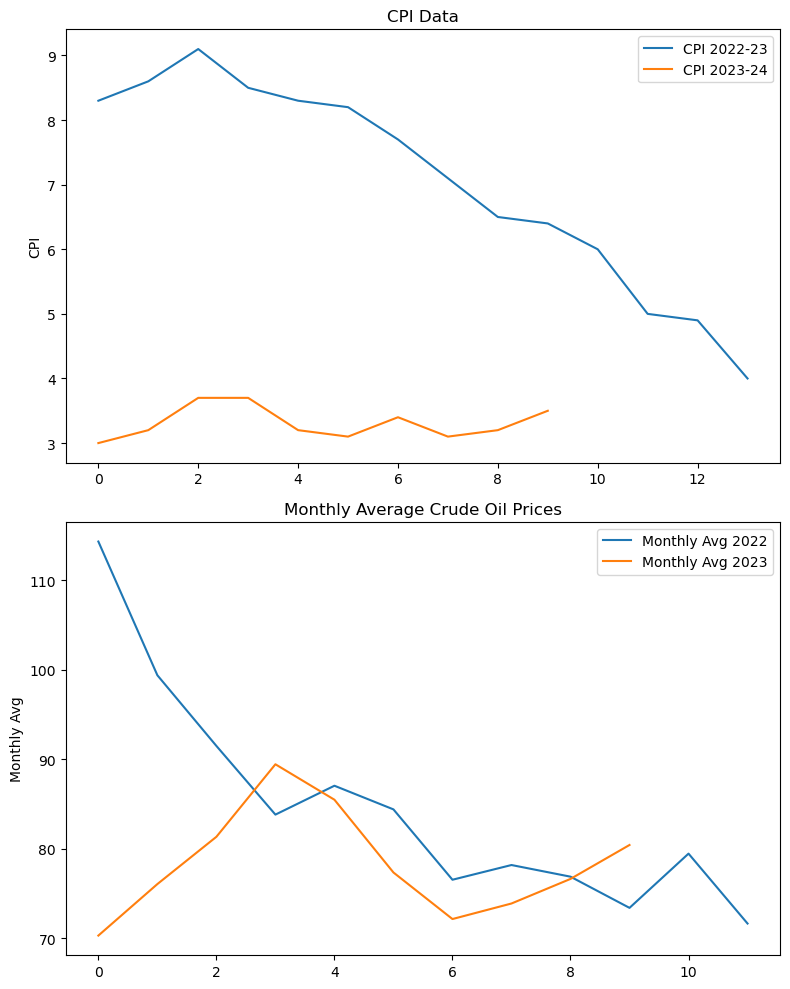

In [57]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot data on the first subplot (ax1)
ax1.plot(cpiYoY_1lag, label='CPI 2022-23', linestyle='-')
ax1.plot(cpiYoY, label='CPI 2023-24', linestyle='-')
ax1.set_ylabel('CPI')
ax1.set_title('CPI Data')
ax1.legend()

# Plot data on the second subplot (ax2)
ax2.plot(monthly_average2022, label='Monthly Avg 2022', linestyle='-')
ax2.plot(monthly_average2023, label='Monthly Avg 2023', linestyle='-')
ax2.set_ylabel('Monthly Avg')
ax2.set_title('Monthly Average Crude Oil Prices')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()